<a href="https://colab.research.google.com/github/damndana/ml-cust/blob/main/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Размер данных: (39480, 9)

Типы данных:
 FirstName              object
FullName               object
user_id                object
town                   object
countPoints           float64
Item                   object
Date           datetime64[ns]
Price                 float64
Format                 object
dtype: object

Пропуски в данных:
 FirstName          0
FullName           0
user_id            0
town               0
countPoints    26105
Item               0
Date               0
Price              0
Format             0
dtype: int64

Первые строки:
   FirstName FullName      user_id    town  countPoints  \
0     Павел    Павел  USER_923730  АСТАНА        335.0   
1     Павел    Павел  USER_923730  АСТАНА        335.0   
2     Артем    Артем  USER_215040  АСТАНА        655.0   
3   Дмитрий  Дмитрий  USER_313086  АСТАНА        378.0   
4   Дмитрий  Дмитрий  USER_313086  АСТАНА        378.0   

                             Item       Date    Price   Format  
0        94140036 Сер

/tmp/ipython-input-4183634106.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_towns.index, y=top_towns.values, palette='viridis')


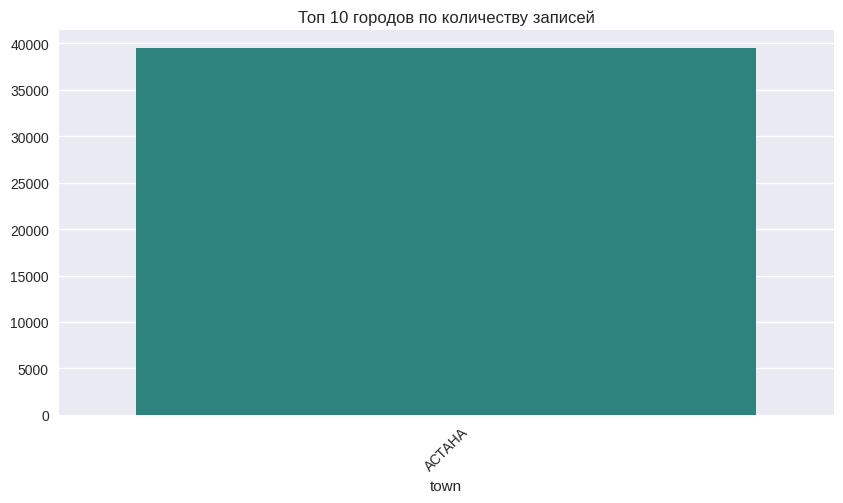


Топ-10 товаров:
 Item
SBOX-001 Сюрприз-бокс (ювелирное изделие)    1946
Коробка универсальная черная SOKOLOV          901
Коробка универсальная белая SOKOLOV           659
81035141445_45 Цепь (Ag 925)                  289
81030140045_45 Цепь (Ag 925)                  268
81030140040_40 Цепь (Ag 925)                  265
Пакет малый бумажный черный_SOKOLOV           222
968030304_40 Цепь (Ag 925)                    212
81035141440_40 Цепь (Ag 925)                  180
968020302_45 Цепь (Ag 925)                    173
Name: count, dtype: int64


/tmp/ipython-input-4183634106.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index, y=top_items.values, palette='coolwarm')


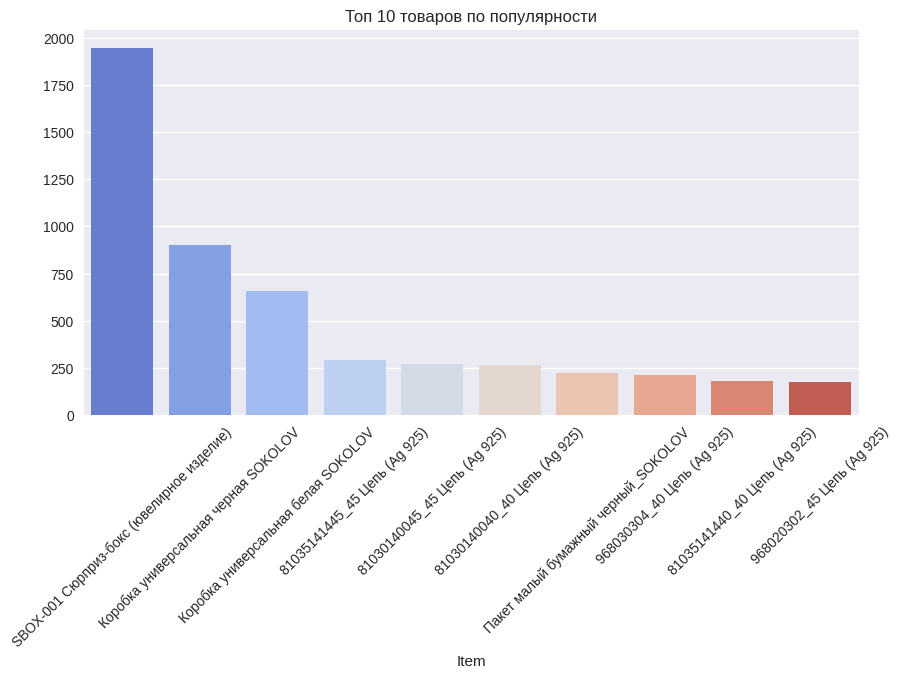

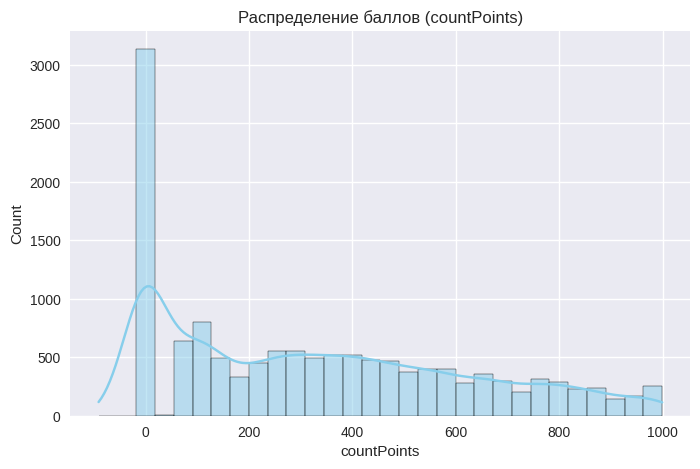

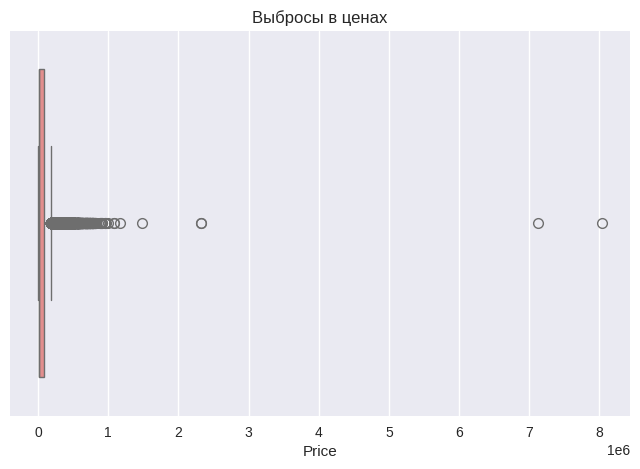

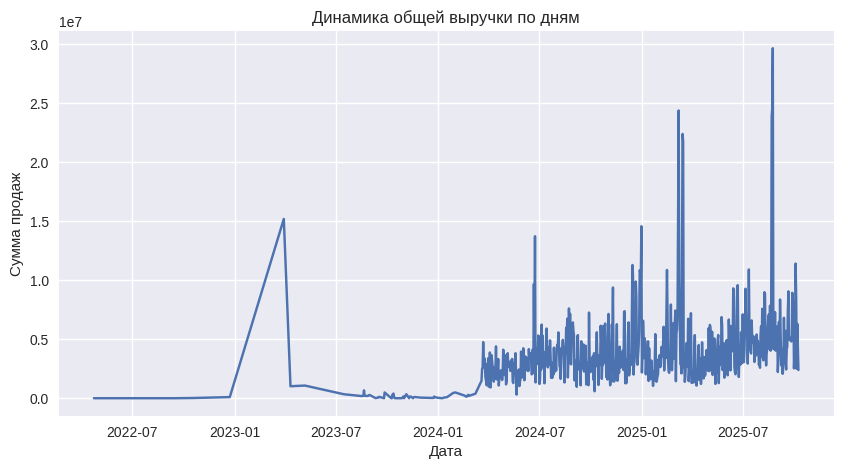


Примеры инсайтов:
- Уникальных пользователей: 18029
- Средняя цена покупки: 59569.80
- Средний балл (countPoints): 332.98
- Самый популярный товар: SBOX-001 Сюрприз-бокс (ювелирное изделие)
- Самый активный город: АСТАНА


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/data_anonymized_with_user_ids.csv')
df['countPoints'] = pd.to_numeric(df['countPoints'], errors='coerce')
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Размер данных:", df.shape)
print("\nТипы данных:\n", df.dtypes)
print("\nПропуски в данных:\n", df.isnull().sum())
print("\nПервые строки:\n", df.head())
print("\nСтатистика:\n", df[['countPoints', 'Price']].describe())
print("\nДубликаты:", df.duplicated().sum())
top_towns = df['town'].value_counts().head(10)
print("\nТоп-10 городов:\n", top_towns)

plt.figure(figsize=(10,5))
sns.barplot(x=top_towns.index, y=top_towns.values, palette='viridis')
plt.title("Топ 10 городов по количеству записей")
plt.xticks(rotation=45)
plt.show()
top_items = df['Item'].value_counts().head(10)
print("\nТоп-10 товаров:\n", top_items)

plt.figure(figsize=(10,5))
sns.barplot(x=top_items.index, y=top_items.values, palette='coolwarm')
plt.title("Топ 10 товаров по популярности")
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(8,5))
sns.histplot(df['countPoints'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Распределение баллов (countPoints)")
plt.show()
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'], color='lightcoral')
plt.title("Выбросы в ценах")
plt.show()
df_by_date = df.groupby('Date')['Price'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(df_by_date['Date'], df_by_date['Price'])
plt.title("Динамика общей выручки по дням")
plt.xlabel("Дата")
plt.ylabel("Сумма продаж")
plt.show()
print("\nПримеры инсайтов:")
print(f"- Уникальных пользователей: {df['user_id'].nunique()}")
print(f"- Средняя цена покупки: {df['Price'].mean():.2f}")
print(f"- Средний балл (countPoints): {df['countPoints'].mean():.2f}")
print(f"- Самый популярный товар: {df['Item'].mode()[0]}")
print(f"- Самый активный город: {df['town'].mode()[0]}")


In [ ]:
low_q, high_q = df['Price'].quantile(0.01), df['Price'].quantile(0.99)
print(f"1 percentage: {low_q:.2f}, 99th percentage: {high_q:.2f}")
df_filtered = df[(df['Price'] > low_q) & (df['Price'] < high_q)]
print("\nДо очистки:")
print(df['Price'].describe())
print("\nПосле очистки:")
print(df_filtered['Price'].describe())

1 percentage: 590.00, 99th percentage: 472578.03

До очистки:
count    3.948000e+04
mean     5.956980e+04
std      1.137424e+05
min      1.000000e+00
25%      4.950000e+03
50%      1.332000e+04
75%      7.599000e+04
max      8.036986e+06
Name: Price, dtype: float64

После очистки:
count     38631.000000
mean      54286.887189
std       82705.064122
min         776.000000
25%        4950.000000
50%       13370.000000
75%       73936.000000
max      472527.000000
Name: Price, dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Выберем числовые колонки
num_cols = ['countPoints', 'Price']

# Масштабирование (z-score)
scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

print("\n📏 После нормализации:")
print(df_scaled[num_cols].describe().T)


📏 После нормализации:
               count          mean       std       min       25%       50%  \
countPoints  13182.0 -7.222935e-17  1.000038 -1.460380 -0.876965 -0.134750   
Price        38631.0 -2.501458e-17  1.000013 -0.647017 -0.596548 -0.494739   

                  75%       max  
countPoints  0.721386  2.302476  
Price        0.237584  5.057073  



Пример анализа по пользователям:
       user_id     Price  countPoints  purchase_count
0  USER_100054   51175.0          0.0               1
1  USER_100070    4950.0          NaN               3
2  USER_100196   20172.0        605.0               1
3  USER_100210   29150.0        874.0               1
4  USER_100218  140124.6          NaN               5


/tmp/ipython-input-3892643063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_id', y='Price', data=top_users, palette='plasma')


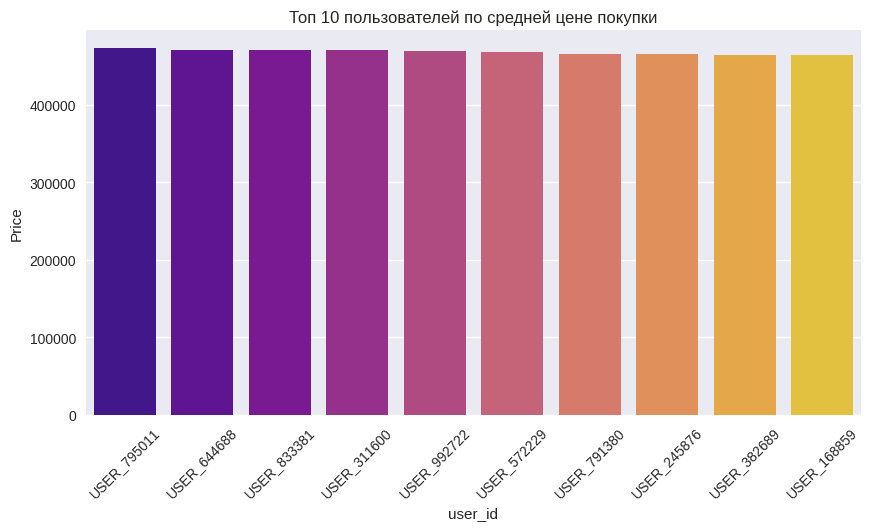

In [ ]:
user_stats = df_filtered.groupby('user_id').agg({
    'Price': 'mean',
    'countPoints': 'mean',
    'Item': 'count'
}).rename(columns={'Item': 'purchase_count'}).reset_index()

print("\nПример анализа по пользователям:")
print(user_stats.head())
top_users = user_stats.sort_values('Price', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='user_id', y='Price', data=top_users, palette='plasma')
plt.title("Топ 10 пользователей по средней цене покупки")
plt.xticks(rotation=45)
plt.show()

🔢 Числовые признаки:
 ['countPoints', 'Price']

📊 Матрица корреляций:
             countPoints     Price
countPoints     1.000000 -0.156077
Price          -0.156077  1.000000


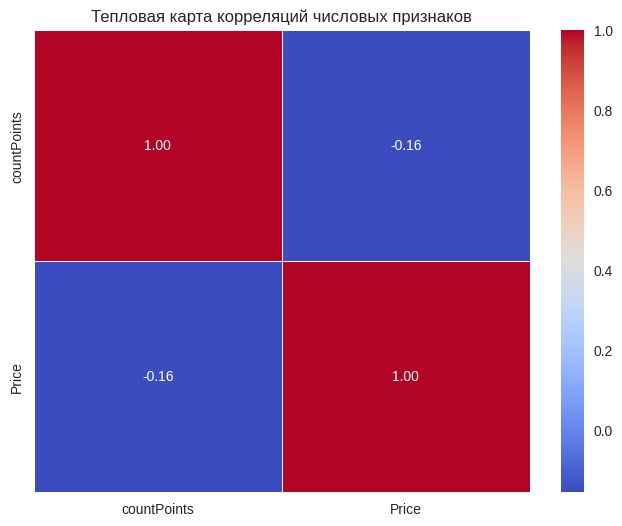

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num_df = df.select_dtypes(include=['number'])
print("Числовые признаки:\n", num_df.columns.tolist())
corr_matrix = num_df.corr(method='pearson')

print("\nМатрица корреляций:")
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Тепловая карта корреляций числовых признаков")
plt.show()


Последняя дата: 2025-10-04
Разделим по дате: 2025-09-04

Target добавлен. Распределение классов:
Target
0    358
1     17
Name: count, dtype: int64


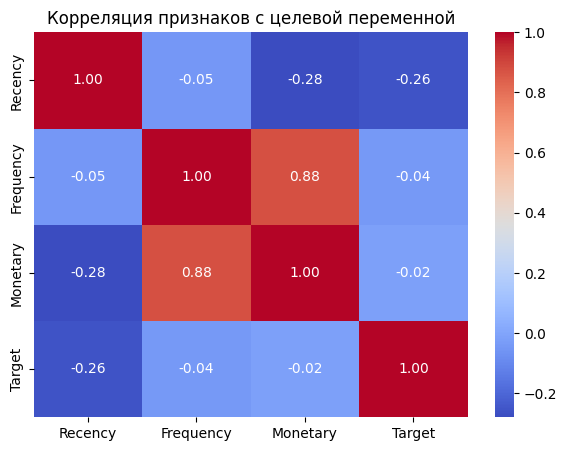

/tmp/ipython-input-380063173.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=rfm, palette='viridis')


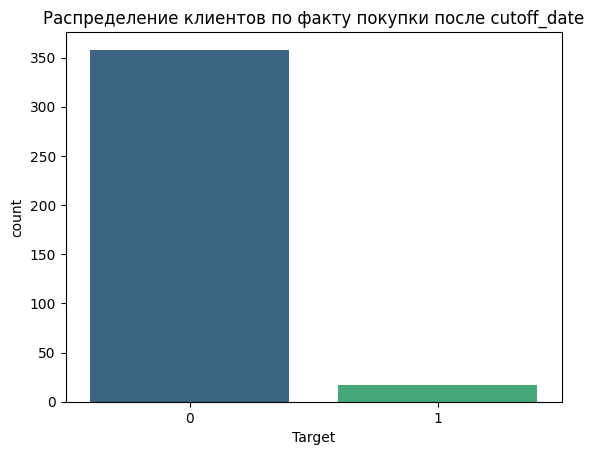

In [ ]:
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
last_date = df['Date'].max()
cutoff_date = last_date - timedelta(days=30)
print("Последняя дата:", last_date.date())
print("Разделим по дате:", cutoff_date.date())
rfm = (
    df.groupby('user_id')
    .agg({
        'Date': lambda x: (last_date - x.max()).days,
        'Price': 'sum',
        'user_id': 'count'
    })
    .rename(columns={'Date': 'Recency', 'user_id': 'Frequency', 'Price': 'Monetary'})
    .reset_index()
)

future_buyers = df[df['Date'] > cutoff_date]['user_id'].unique()
rfm['Target'] = rfm['user_id'].isin(future_buyers).astype(int)

print("\nTarget добавлен. Распределение классов:")
print(rfm['Target'].value_counts())
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']] = scaled_features
corr = rfm[['Recency', 'Frequency', 'Monetary', 'Target']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляция признаков с целевой переменной")
plt.show()

sns.countplot(x='Target', data=rfm, palette='viridis')
plt.title("Распределение клиентов по факту покупки после cutoff_date")
plt.show()


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


0:	test: 1.0000000	best: 1.0000000 (0)	total: 49.6ms	remaining: 49.6s
100:	test: 1.0000000	best: 1.0000000 (0)	total: 199ms	remaining: 1.77s
200:	test: 1.0000000	best: 1.0000000 (0)	total: 401ms	remaining: 1.59s
300:	test: 1.0000000	best: 1.0000000 (0)	total: 592ms	remaining: 1.38s
400:	test: 1.0000000	best: 1.0000000 (0)	total: 860ms	remaining: 1.28s
500:	test: 1.0000000	best: 1.0000000 (0)	total: 1.53s	remaining: 1.53s
600:	test: 1.0000000	best: 1.0000000 (0)	total: 2.13s	remaining: 1.42s
700:	test: 1.0000000	best: 1.0000000 (0)	total: 2.48s	remaining: 1.06s
800:	test: 1.0000000	best: 1.0000000 (0)	total: 2.95s	remaining: 734ms
900:	test: 1.0000000	best: 1.0000000 (0)	total: 3.24s	remaining: 356ms
999:	test: 1.0000000	best: 1.0000000 (0)	total: 3.65s	remaining: 0us

bestTest = 1
bestIteration = 0

Shrink model to first 1 iterations.

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1

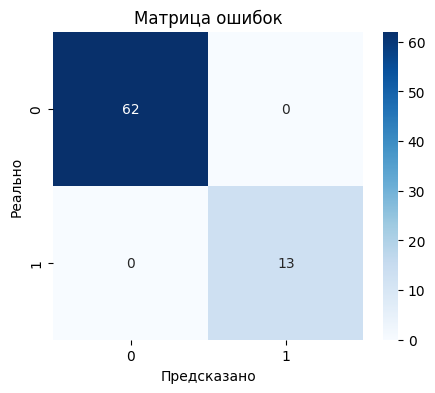

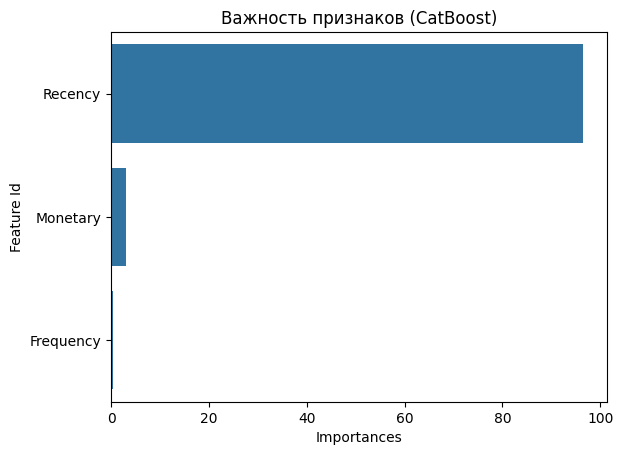

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    eval_metric='AUC',
    random_seed=42,
    verbose=100,
    loss_function='Logloss'
)
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок")
plt.xlabel("Предсказано")
plt.ylabel("Реально")
plt.show()
feat_imp = model.get_feature_importance(prettified=True)
sns.barplot(x='Importances', y='Feature Id', data=feat_imp)
plt.title("Важность признаков (CatBoost)")
plt.show()


Accuracy (точность): 1.0000
ROC-AUC: 1.0000

Подробный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        13

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


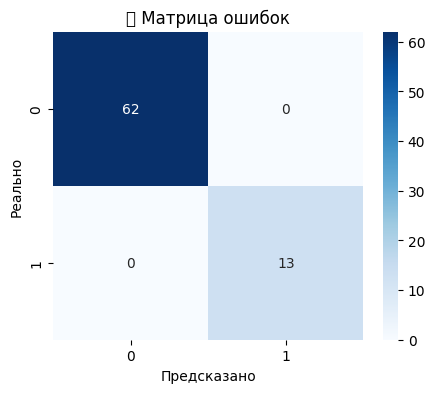

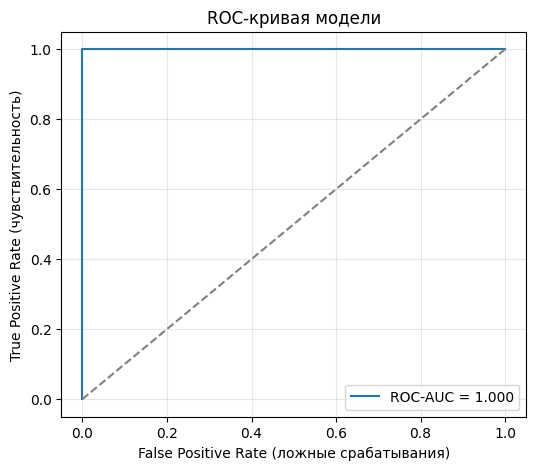

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy (точность): {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nПодробный отчет:")
print(classification_report(y_test, y_pred))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📉 Матрица ошибок")
plt.xlabel("Предсказано")
plt.ylabel("Реально")
plt.show()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC-кривая модели")
plt.xlabel("False Positive Rate (ложные срабатывания)")
plt.ylabel("True Positive Rate (чувствительность)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
df['Date'].max()

Timestamp('2025-10-09 00:00:00')

Распределение меток:
Target
0    309
1     66
Name: count, dtype: int64
Процент покупателей: 17.6 %

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        13

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

ROC-AUC: 1.0


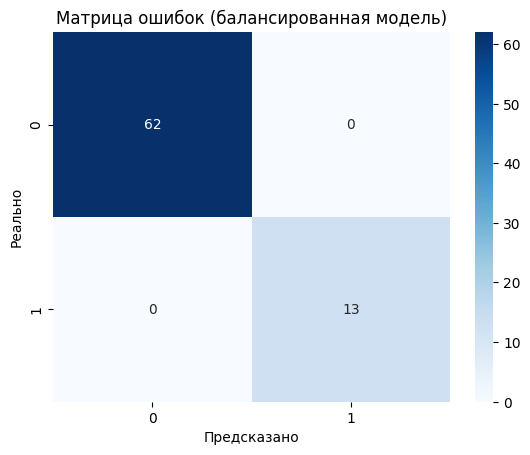

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
cutoff_days = 90

rfm['Target'] = (rfm['Recency'] <= cutoff_days).astype(int)

print("Распределение меток:")
print(rfm['Target'].value_counts())
print("Процент покупателей:", round(rfm['Target'].mean() * 100, 2), "%")

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок (балансированная модель)')
plt.xlabel('Предсказано')
plt.ylabel('Реально')
plt.show()


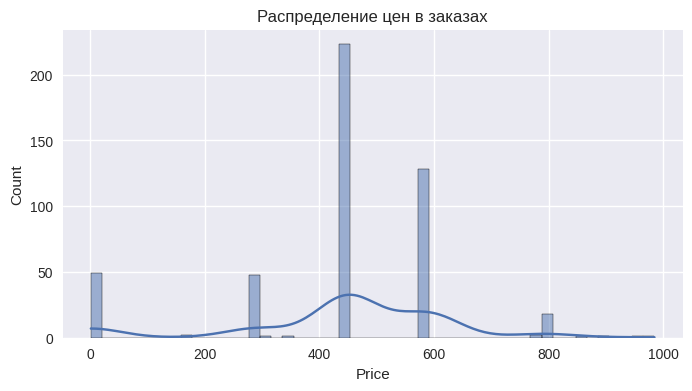

In [ ]:
df['Price'].describe()
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Распределение цен в заказах")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
ROC-AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4996
           1       1.00      1.00      1.00       413

    accuracy                           1.00      5409
   macro avg       1.00      1.00      1.00      5409
weighted avg       1.00      1.00      1.00      5409



In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('/content/data_anonymized_with_user_ids.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)


df = df.dropna(subset=['user_id', 'Date', 'Price'])
df = df[df['Price'] > 0]

last_date = df['Date'].max()
cutoff_date = last_date - timedelta(days=30)
print(f"Последняя дата: {last_date.date()}")
print(f"Cutoff (30 дней): {cutoff_date.date()}")

rfm = (
    df.groupby('user_id')
    .agg(
        Recency = ('Date', lambda x: (last_date - x.max()).days),  # дни с последней покупки
        Frequency = ('Date', 'count'),                            # количество покупок
        Monetary = ('Price', 'sum')                               # суммарные траты
    )
    .reset_index()
)

rfm['Monetary_log'] = np.log1p(rfm['Monetary'])
rfm['Target'] = (rfm['Recency'] <= 30).astype(int)

print("\nРаспределение Target:")
print(rfm['Target'].value_counts(), "\n")
print(rfm[['Recency','Frequency','Monetary']].describe())

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Target']

model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
model.fit(X, y)
rfm['ProbFutureBuy'] = model.predict_proba(X)[:, 1]
future_buyers = rfm.sort_values('ProbFutureBuy', ascending=False)
likely_future = future_buyers[future_buyers['ProbFutureBuy'] > 0.7]

print("\nТоп-20 пользователей с наибольшей вероятностью покупки:")
print(likely_future[['user_id', 'ProbFutureBuy', 'Recency', 'Frequency', 'Monetary']].head(20))
print(f"\nВсего таких пользователей: {len(likely_future)}")


Последняя дата: 2025-10-09
Cutoff (30 дней): 2025-09-09

Распределение Target:
Target
0    16652
1     1377
Name: count, dtype: int64 

            Recency     Frequency      Monetary
count  18029.000000  18029.000000  1.802900e+04
mean     228.909812      2.189805  1.304463e+05
std      163.568753      2.598882  2.853780e+05
min        0.000000      1.000000  1.000000e+00
25%       82.000000      1.000000  1.077700e+04
50%      210.000000      1.000000  3.127100e+04
75%      354.000000      2.000000  1.383450e+05
max     1265.000000    115.000000  1.666117e+07

Топ-20 пользователей с наибольшей вероятностью покупки:
           user_id  ProbFutureBuy  Recency  Frequency   Monetary
14270  USER_813793            1.0       12          1    82950.0
6069   USER_405191            1.0       20          1    13500.0
12535  USER_725849            1.0       22          1   152300.0
8179   USER_511203            1.0        1         12  1449548.0
8180   USER_511224            1.0       13        

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    random_state=42,
    verbose=False
)

cat_model.fit(X_train, y_train)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]
print("CatBoost ROC-AUC:", roc_auc_score(y_test, y_proba_cat))


CatBoost ROC-AUC: 1.0


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
df = pd.read_csv('/content/data_anonymized_with_user_ids.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Price'] = (
    df['Price']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)
    .replace('', np.nan)
    .astype(float)
)
df = df.dropna(subset=['user_id', 'Date', 'Price'])
df = df[df['Price'] > 0]
last_date = df['Date'].max()
cutoff_date = last_date - timedelta(days=30)
print(f"Последняя дата: {last_date.date()}")
print(f"Cutoff (граница последних 30 дней): {cutoff_date.date()}")

rfm = (
    df.groupby('user_id')
    .agg({
        'Date': [lambda x: (last_date - x.max()).days, 'count'],
        'Price': 'sum'
    })
)
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

rfm['Target'] = rfm['Recency'].apply(lambda x: 1 if x <= 30 else 0)

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=False
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print("\nAccuracy:", round(acc, 4))
print("ROC-AUC:", round(roc_auc, 4))
print("\nОтчёт по классам:")
print(classification_report(y_test, y_pred, digits=3))

print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))

rfm['ProbFutureBuy'] = model.predict_proba(X)[:, 1]
likely_future = rfm[rfm['ProbFutureBuy'] > 0.7].sort_values('ProbFutureBuy', ascending=False)

print("\nТоп-20 пользователей с наибольшей вероятностью покупки после 9 октября:\n")
print(likely_future[['user_id', 'ProbFutureBuy', 'Recency', 'Frequency', 'Monetary']].head(20))
print(f"\nВсего таких пользователей: {len(likely_future)}")
print(df.head())


Последняя дата: 2025-10-09
Cutoff (граница последних 30 дней): 2025-09-09

Accuracy: 1.0
ROC-AUC: 1.0

Отчёт по классам:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      4996
           1      1.000     1.000     1.000       413

    accuracy                          1.000      5409
   macro avg      1.000     1.000     1.000      5409
weighted avg      1.000     1.000     1.000      5409

Матрица ошибок:
[[4996    0]
 [   0  413]]

Топ-20 пользователей с наибольшей вероятностью покупки после 9 октября:

           user_id  ProbFutureBuy  Recency  Frequency  Monetary
13643  USER_781537       0.999895       14          2   33650.0
6924   USER_448650       0.999895       23          2   47302.0
9040   USER_553630       0.999895       14          2   50739.0
10724  USER_635756       0.999894       16          2   49260.0
7203   USER_463088       0.999894       16          2   55589.0
15346  USER_864459       0.999894       16         

In [ ]:
import pandas as pd
df = pd.read_csv('/content/data_anonymized_with_user_ids.csv')
df.head()

,FirstName,FullName,user_id,town,countPoints,Item,Date,Price,Format
0,Павел,Павел,USER_923730,АСТАНА,335,94140036 Серьги (Ag 925),2024-09-25,28 000,Оффлайн
1,Павел,Павел,USER_923730,АСТАНА,335,94020535 Серьги (Ag 925),2024-09-25,11 199,Оффлайн
2,Артем,Артем,USER_215040,АСТАНА,655,94026740 Серьги (Ag 925),2024-11-14,21 860,Оффлайн
3,Дмитрий,Дмитрий,USER_313086,АСТАНА,378,10-0179_ам_175 Кольцо (Ag 925),2024-06-21,4 511,Оффлайн
4,Дмитрий,Дмитрий,USER_313086,АСТАНА,378,11-0075_АМ Серьги (Ag 925),2024-06-21,7 088,Оффлайн
